## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

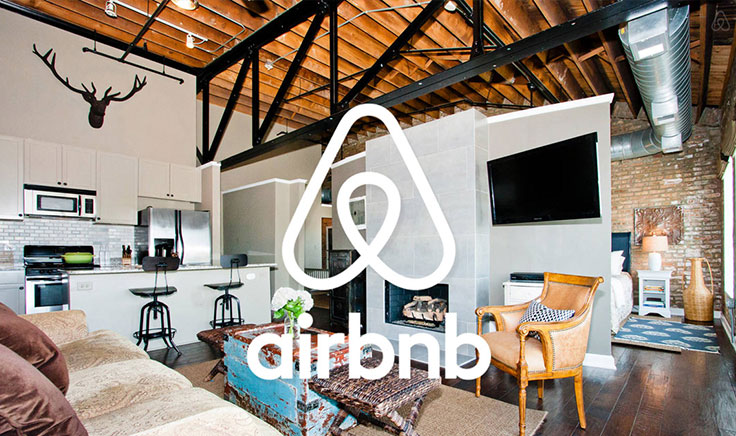

# Importing Libraries

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Mounting Google Drive

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the Airbnb (NYC) 2019 Dataset

In [40]:
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone Projects/EDA - Aribnb Bookings/Airbnb NYC 2019.csv")

# Data Manipulation

## Overview of the Dataset

In [41]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [42]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


## Understanding the Dataset

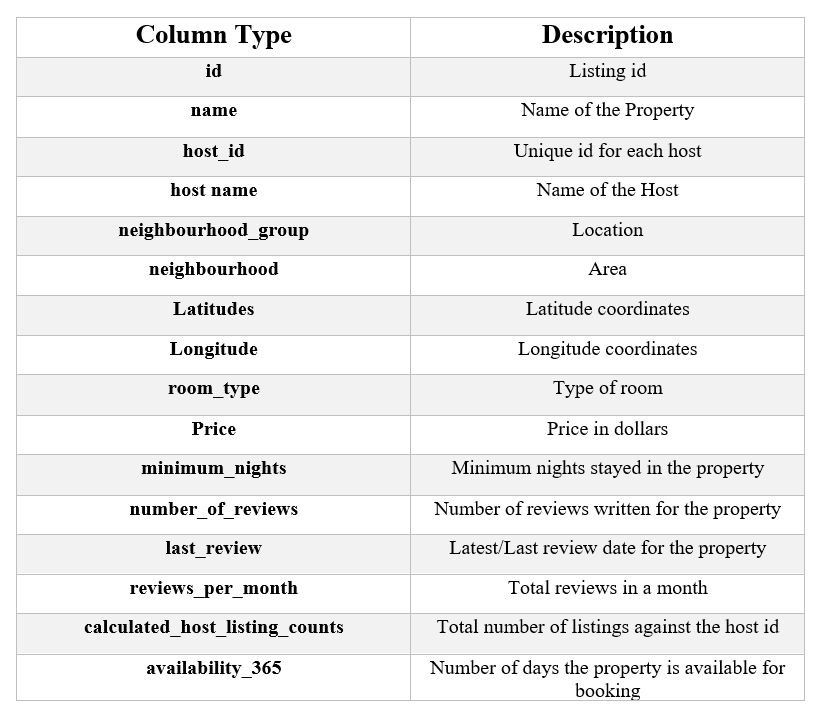

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

## Finding Null Vales in the Dataset

In [44]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Understanding from above:
1. Total 4 columns contains null values.
2. Columns named - last_review and reviews_per_month contains 10k+ null values.
3. Either drop the above columns if they are not important for Analysis or put 0 in all the null values. 

## Unique Value Insights

In [45]:
df.nunique()

id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

### Understanding from above:
1. Columns such as host_id represents that there are 37457 hosts listed in the Dataset.
2. We can see that host_name < host_id, from this we can conclude that the hosts might have more than one properties listed on Airbnb.
3. NYC is divided among 5 groups.
4. Room types are divided into 3 types.

In [46]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Understanding from above:
1. The mean price of the room is $152.72
2. Average availability of the room is 112 days in a year.

## Finding Neigbourhood Group Types

In [47]:
pd.DataFrame(df.neighbourhood_group.unique(), columns = ['neighbourhood_group'])

,neighbourhood_group
0,Brooklyn
1,Manhattan
2,Queens
3,Staten Island
4,Bronx


## Finding Room Types

In [48]:
pd.DataFrame(df.room_type.unique(), columns = ['room_type'])

,room_type
0,Private room
1,Entire home/apt
2,Shared room


# Data Cleaning

### Getting rid of Null values in the Dataset:
1. Columns - 'last_review' and 'reviews_per_month' contains 10k+ null values. So, replacing them with '0'.
2. Columns - 'names' and 'host_names' have some null values. So, replacing them with 'Not Applicable'.

In [49]:
df['last_review'].fillna(0, inplace = True)
df['reviews_per_month'].fillna(0, inplace = True)
df['name'].fillna("Not Applicable", inplace = True)
df['host_name'].fillna("Not Applicable", inplace = True)

### Dropping last_review column

In [50]:
df.drop(['last_review'], axis = 1, inplace = True)

In [51]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

# Checking any Null Value in the Dataset

In [52]:
print(df.isnull().any())

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool


# Data Visualization and Exploratory Data Analysis (EDA)

## Plotting different graphs on the basis of Latitudes and Longitudes coordinates.

In [53]:
import pandas as pd
properties_loc = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Capstone Projects/EDA - Aribnb Bookings/Airbnb NYC 2019.csv")

import plotly.express as px

fig = px.scatter_mapbox(properties_loc, lat="latitude", lon="longitude", hover_name="neighbourhood_group", hover_data=["neighbourhood", "availability_365", "price"],
                        color_discrete_sequence=["teal"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

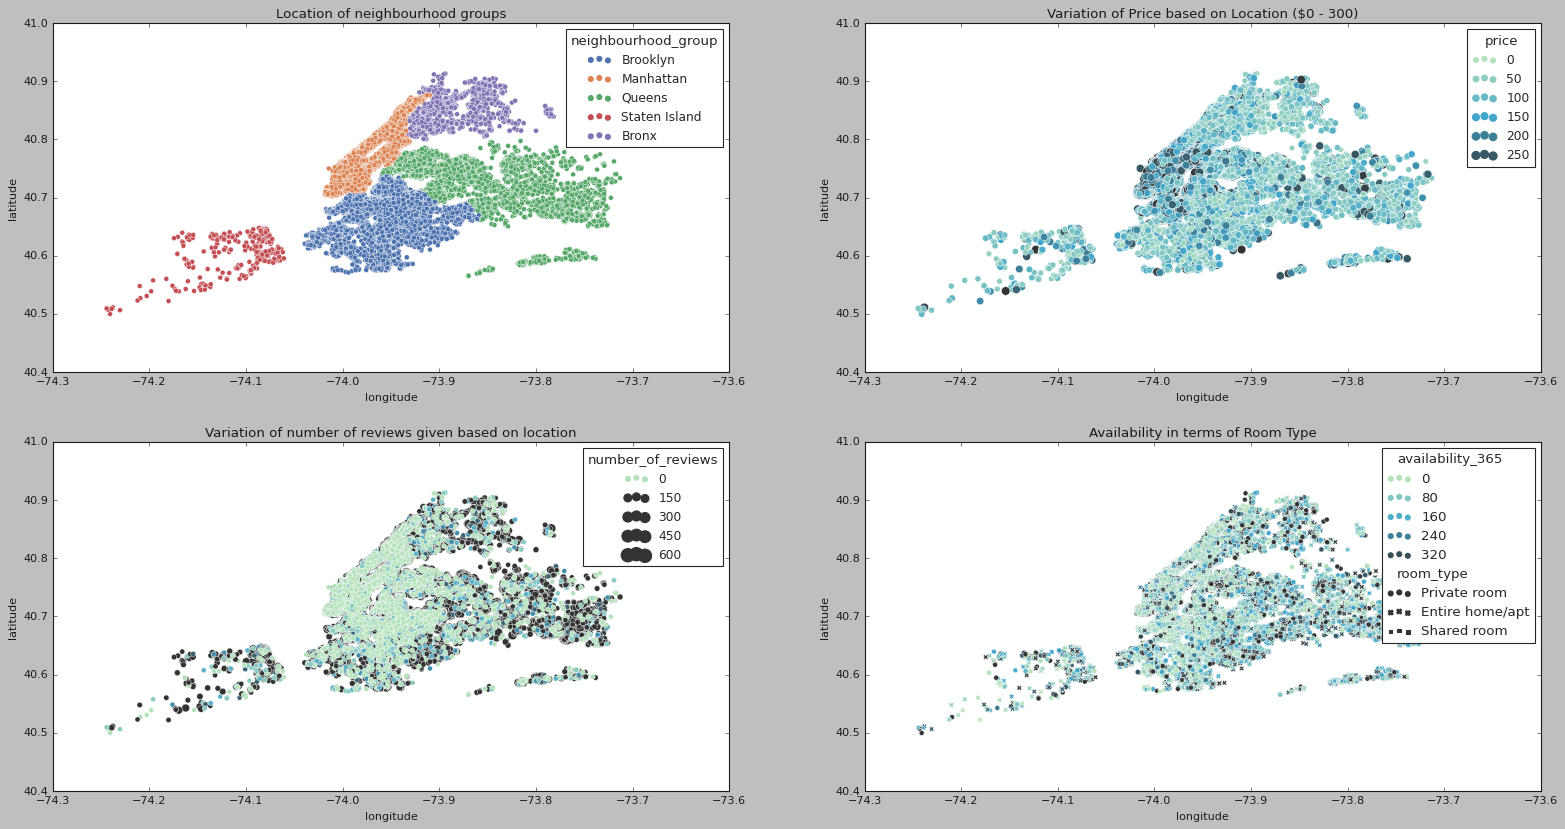

In [54]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24, 12))
ax = axes.flatten()

sns.set_theme(style="white")
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', ax=ax[0]);
ax[0].set_title('Location of neighbourhood groups')
sns.scatterplot(data=df[df['price'] < 300], x='longitude', y='latitude', hue='price', size="price", sizes=(20, 60), palette='GnBu_d', ax=ax[1])
ax[1].set_title('Variation of Price based on Location ($0 - 300)')
sns.scatterplot(data=df, x='longitude', y='latitude', hue='number_of_reviews', size="number_of_reviews", sizes=(20, 150), palette='GnBu_d', hue_norm=(0, 5), ax=ax[2])
ax[2].set_title('Variation of number of reviews given based on location')
sns.scatterplot(data=df, x='longitude', y='latitude', hue='availability_365', style="room_type", palette='GnBu_d', ax=ax[3])
ax[3].set_title('Availability in terms of Room Type')
plt.show()

## Neighbourhood wise listings

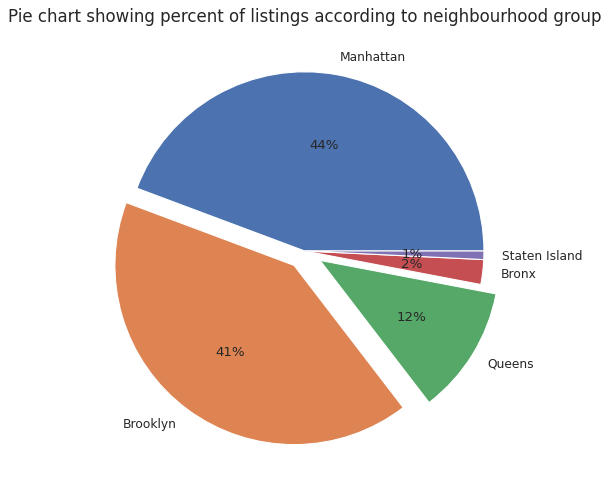

In [55]:
# Finding no. of Airbnb listing neighbourhood_group wise. 
groupwise_listing = df["neighbourhood_group"].value_counts(sort=True)

# Showing data percentage wise
plt.figure(figsize=(13,7))
exp = [0, 0.1, 0.1, 0, 0]
plt.pie(groupwise_listing,labels = groupwise_listing.index, explode = exp , autopct='%1.0f%%' )
plt.title("Pie chart showing percent of listings according to neighbourhood group" , size =15)
plt.show()

### Understandings from above:
1. Brooklyn and Manhattan has the maximum percentage of listings.
2. Staten Island and Bronx contribute the lowest.

## Finding the Host which has highest number of properties.

In [56]:
top_host_id = df['host_id'].value_counts().sort_values(ascending = False).head(10)
top_host_id

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [57]:
name_list = []
for i in top_host_id.index:
  name_list.append(df[df['host_id'] == i]['host_name'].unique())

new_name = []
for i in range(10):
  new_name.append(name_list[i][0])

print(new_name)

['Sonder (NYC)', 'Blueground', 'Kara', 'Kazuya', 'Jeremy & Laura', 'Sonder', 'Corporate Housing', 'Ken', 'Pranjal', 'Vida']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



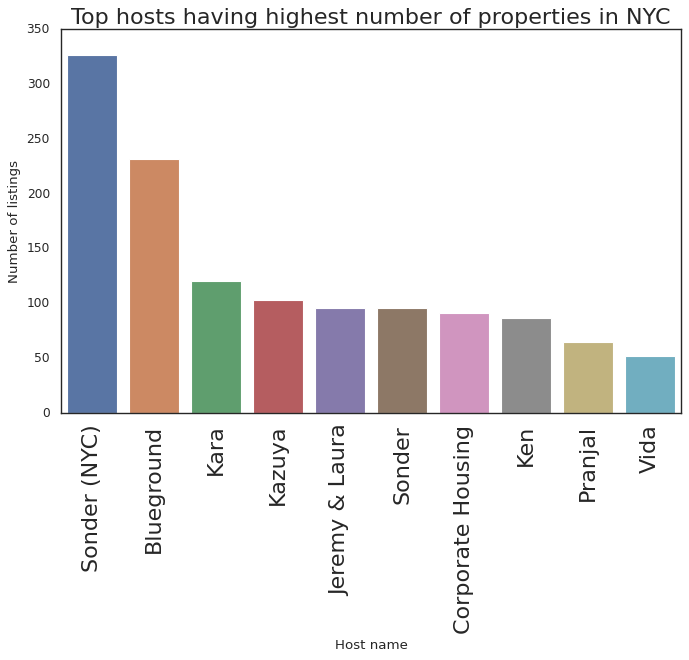

In [58]:
x = new_name
y = top_host_id.to_list()
# Ploting bar graph to visualize number_of_reviews by neighbourhood_group
plt.figure(figsize=(10,6))
sns.barplot(x , y)

plt.xticks(rotation = 90,size =20)

plt.title('Top hosts having highest number of properties in NYC', size = 20)
plt.xlabel('Host name')
plt.ylabel('Number of listings')

plt.rc('font', size=15)
plt.rc('axes', titlesize=10) 
plt.rc('axes', labelsize=15) 
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rc('legend', fontsize=10)

## Most reviewed Neighbourhood

In [59]:
# Sum of reviews by neighbourhood_group 
rev_nbhd = df.groupby(["neighbourhood_group"])['number_of_reviews'].sum().reset_index()
rev_nbhd

,neighbourhood_group,number_of_reviews
0,Bronx,28371
1,Brooklyn,486574
2,Manhattan,454569
3,Queens,156950
4,Staten Island,11541


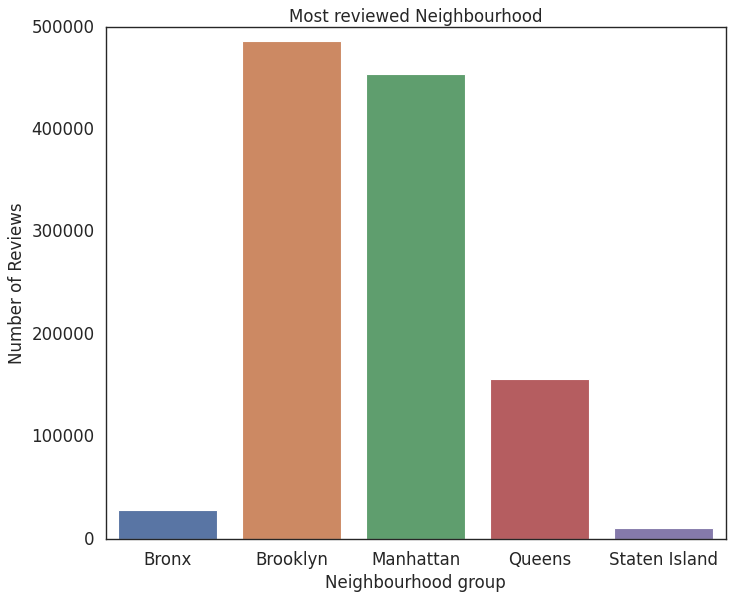

In [60]:
# Ploting bar graph to visualize number_of_reviews by neighbourhood_group
plt.figure(figsize=(10,8))
sns.barplot(x= 'neighbourhood_group' , y= 'number_of_reviews', data = rev_nbhd)

plt.title('Most reviewed Neighbourhood', size = 15)
plt.xlabel('Neighbourhood group')
plt.ylabel('Number of Reviews')

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

# Most reviewed Room types

In [61]:
# Sum of reviews by neighbourhood_group 
rev_room_type = df.groupby(["room_type"])['number_of_reviews'].sum().reset_index()
rev_room_type

,room_type,number_of_reviews
0,Entire home/apt,580403
1,Private room,538346
2,Shared room,19256


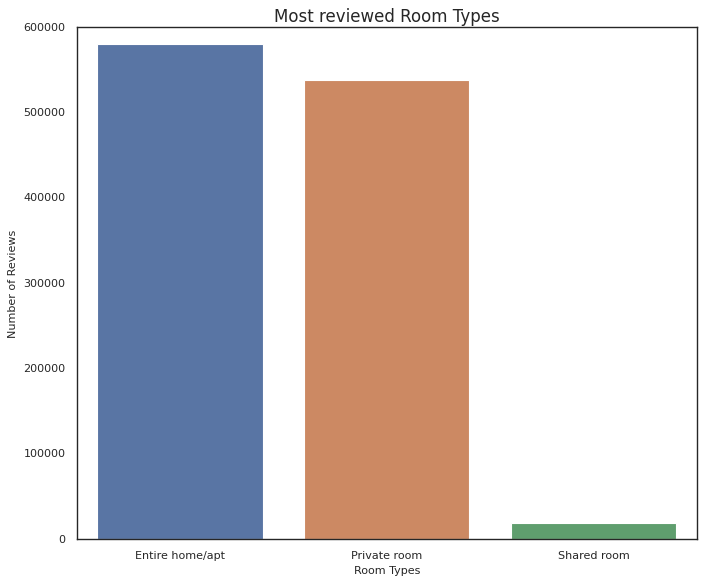

In [62]:
# Ploting bar graph to visualize number_of_reviews by room type
plt.figure(figsize=(10,8))
sns.barplot(x= 'room_type' , y= 'number_of_reviews', data = rev_room_type)

plt.title('Most reviewed Room Types', size = 15)
plt.xlabel('Room Types')
plt.ylabel('Number of Reviews')

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

## Room Types on Neighbourhood Group

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



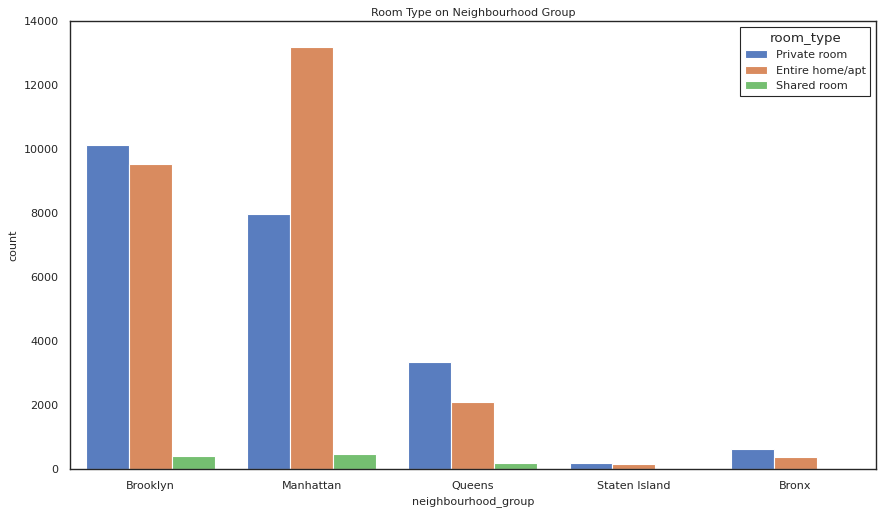

In [63]:
plt.figure(figsize=(13,7))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df.neighbourhood_group, hue = df.room_type , palette="muted")
fig = plt.gcf()
plt.show()

## Availibility according to neighbourhood group and room type.

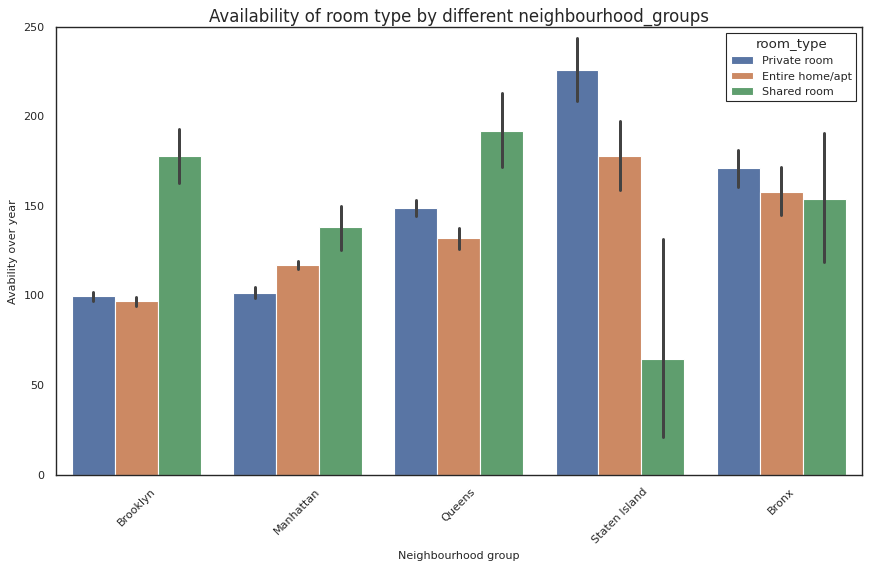

In [64]:

plt.figure(figsize=(13,7))
sns.barplot(x='neighbourhood_group', y='availability_365',hue ='room_type', data=df)
plt.xticks(rotation = 45,size =10,)     

plt.title('Availability of room type by different neighbourhood_groups', size = 15)
plt.xlabel('Neighbourhood group')
plt.ylabel('Avability over year')

plt.rc('font', size=20) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=20) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

## Neighbourhood Group Vs Room Availability

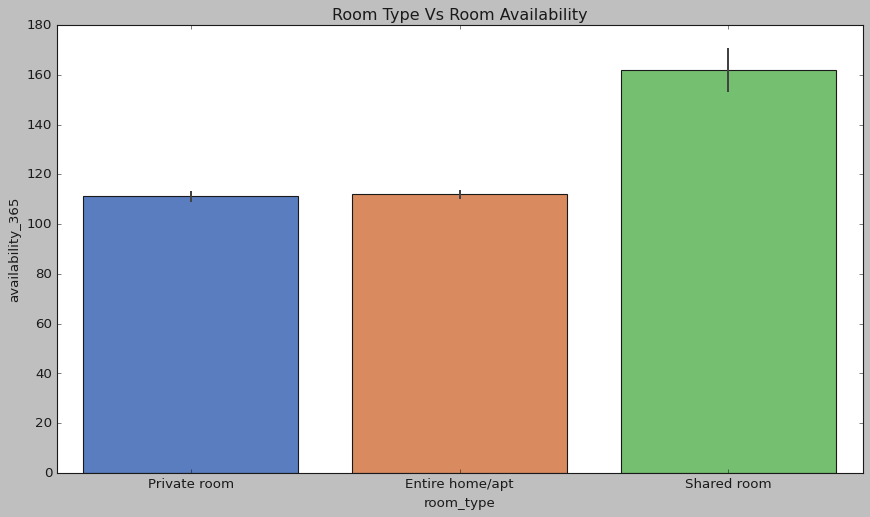

In [65]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Room Type Vs Room Availability")
sns.barplot(data=df, x = 'room_type', y = 'availability_365', palette = "muted")
plt.show()

## Calculating Revenue generated from different properties.

In [66]:
df["revenue_generated"] = (365-df["availability_365"]) * df["price"]
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenue_generated
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,2250
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,15219
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,29200


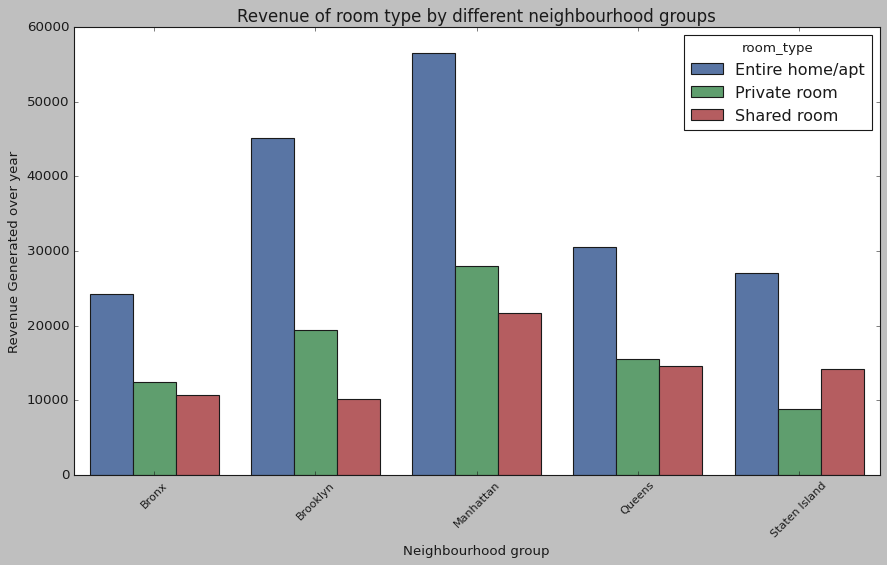

In [67]:
mean_revenue = df.groupby(["neighbourhood_group","room_type"])["revenue_generated"].mean().reset_index(name="revenue_generated")
plt.figure(figsize=(13,7))
sns.barplot(x='neighbourhood_group', y="revenue_generated",hue ='room_type', data=mean_revenue)
plt.xticks(rotation = 45,size =10)

plt.title('Revenue of room type by different neighbourhood groups', size = 15)
plt.xlabel('Neighbourhood group')
plt.ylabel('Revenue Generated over year')

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

## Top Properties in terms of Revenue generation

In [68]:
top_properties = df.nlargest(5, ['revenue_generated']).head()
top_properties

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,revenue_generated
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0,3650000
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0,3650000
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02,1,0,3649635
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83,2820000
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14,1,83,2819718


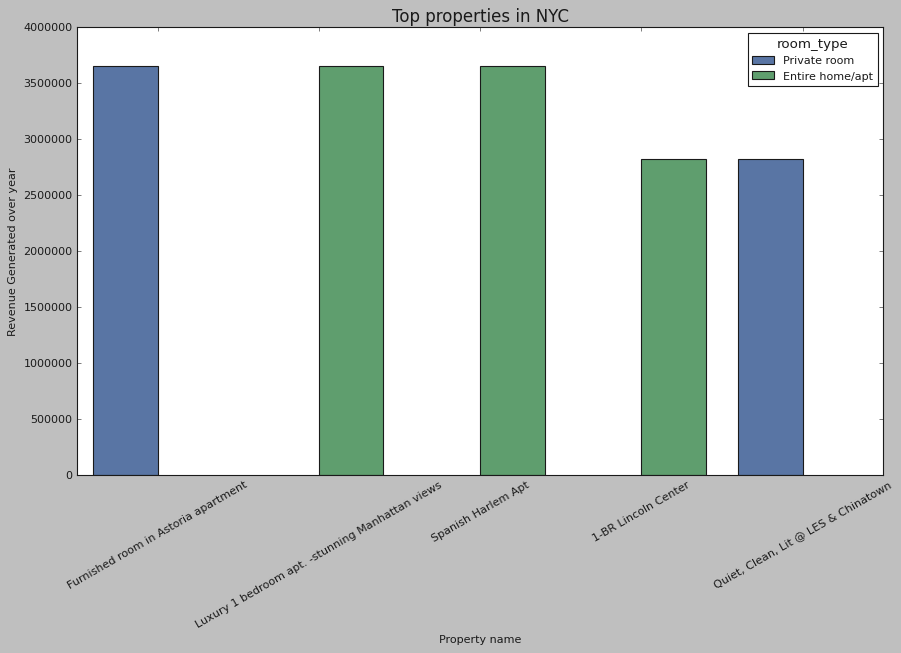

In [69]:

plt.figure(figsize=(13,7))
sns.barplot(x='name', y="revenue_generated",hue ='room_type', data=top_properties)
plt.xticks(rotation = 30,size =10)

plt.title('Top properties in NYC', size = 15)
plt.xlabel('Property name')
plt.ylabel('Revenue Generated over year')

plt.rc('font', size=10) #controls default text size
plt.rc('axes', titlesize=10) #fontsize of the title
plt.rc('axes', labelsize=10) #fontsize of the x and y labels
plt.rc('xtick', labelsize=10) #fontsize of the x tick labels
plt.rc('ytick', labelsize=10) #fontsize of the y tick labels
plt.rc('legend', fontsize=10) #fontsize of the legend

## Mean Price of various Property types.

Index(['Entire home/apt', 'Private room', 'Shared room'], dtype='object', name='room_type')


<function matplotlib.pyplot.show>

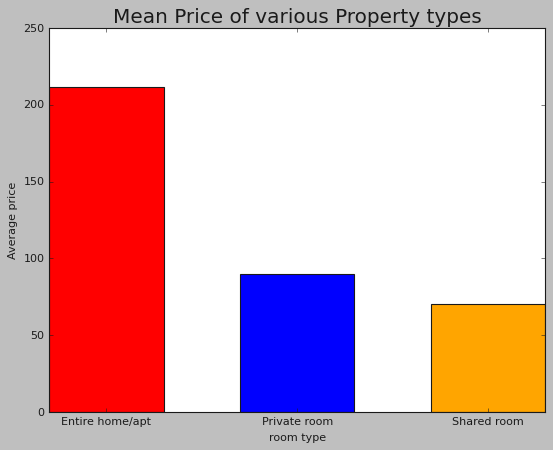

In [70]:
mean_price=df.groupby('room_type')['price'].mean()
room_type = mean_price.index
print(room_type)
plt.bar(room_type,mean_price,color=['red', 'blue', 'orange'], width=0.6)
plt.title('Mean Price of various Property types',size=18)
plt.ylabel('Average price')
plt.xlabel('room type',size=10)
plt.xticks(rotation=0)
plt.show

## Mean Cost of various Listings as per Neighbourhood Group

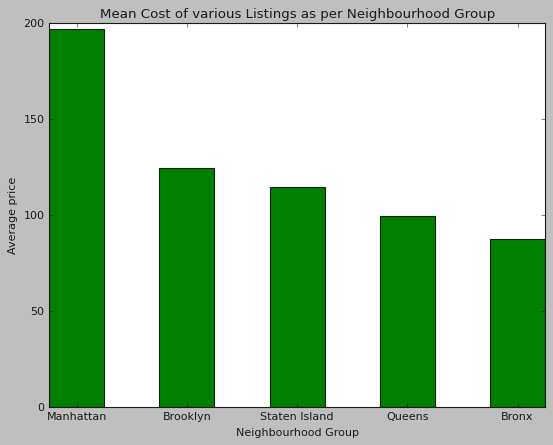

In [71]:
average_price = df.groupby('neighbourhood_group')['price'].mean()
average_price.sort_values(ascending = False, inplace = True)
plt.bar( average_price.index, average_price, color = 'green', width = 0.5 )

plt.title('Mean Cost of various Listings as per Neighbourhood Group',size=12)
plt.ylabel('Average price')
plt.xlabel('Neighbourhood Group',size=10)
plt.xticks(rotation=0)
plt.show

plt.show()

## Affordable Listings On the Dataset.

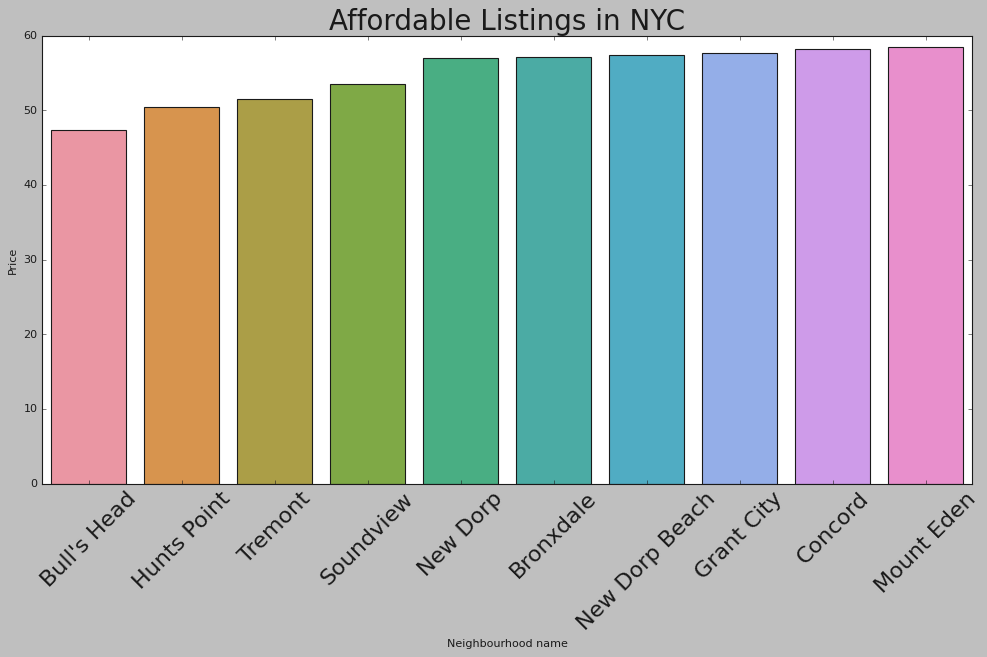

In [72]:
plt.figure(figsize=(15,7))
affordable_nbhd = df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = True).reset_index()
affordable_nbhd.head(10)
sns.barplot(x = affordable_nbhd['neighbourhood'].head(10), y= affordable_nbhd['price'].head(10))
plt.xticks(rotation = 45,size =20)

plt.title('Affordable Listings in NYC', size = 25)
plt.xlabel('Neighbourhood name')
plt.ylabel('Price')

s = 10

plt.rc('font', size=s) 
plt.rc('axes', titlesize=s) 
plt.rc('axes', labelsize=s) 
plt.rc('xtick', labelsize=s) 
plt.rc('ytick', labelsize=s) 
plt.rc('legend', fontsize=s) 

plt.show()

## Costlier Listings On the Dataset.

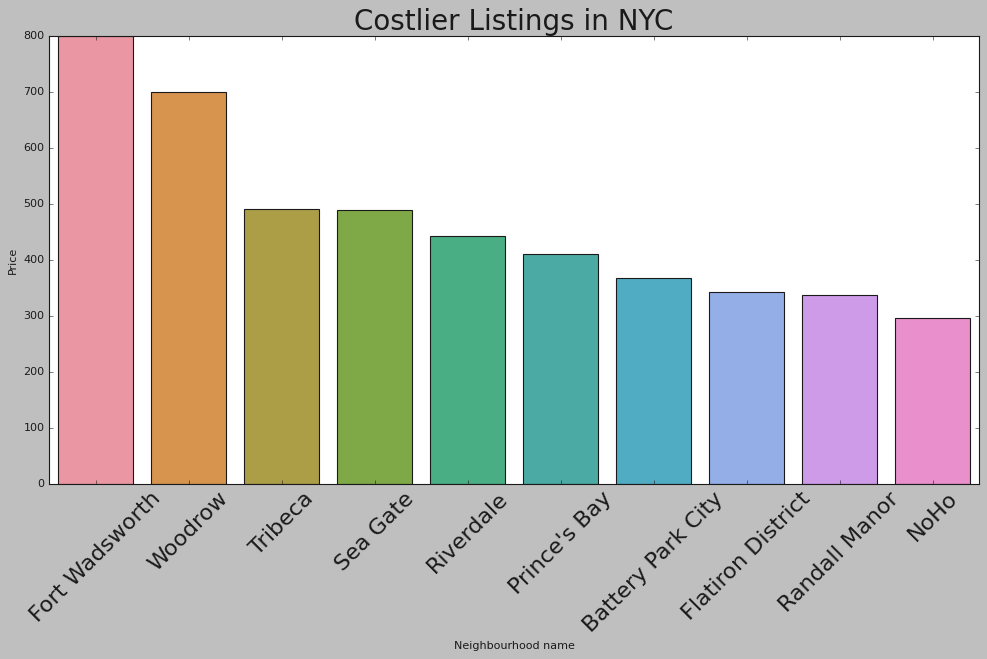

In [73]:
plt.figure(figsize=(15,7))
affordable_nbhd = df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = False).reset_index()
affordable_nbhd.head(10)
sns.barplot(x = affordable_nbhd['neighbourhood'].head(10), y= affordable_nbhd['price'].head(10))
plt.xticks(rotation = 45,size =20)

plt.title('Costlier Listings in NYC', size = 25)
plt.xlabel('Neighbourhood name')
plt.ylabel('Price')

s = 10

plt.rc('font', size=s) 
plt.rc('axes', titlesize=s) 
plt.rc('axes', labelsize=s) 
plt.rc('xtick', labelsize=s) 
plt.rc('ytick', labelsize=s) 
plt.rc('legend', fontsize=s) 

plt.show()